In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("all_data.csv")

In [3]:
df

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [4]:
country_list = df.Country.unique()
country_list

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [33]:
df_mean = df.groupby("Country").mean().drop("Year", axis = 1).reset_index()

In [34]:
df_mean

,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


# Work on the means

### Mean life expectancy per Country

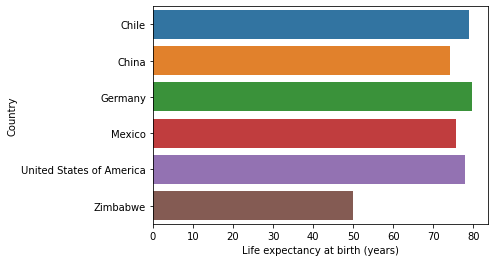

In [36]:
sns.barplot(x="Life expectancy at birth (years)", y="Country", data=df_mean)
plt.show()

Life expaectancy is smaller in Zimbabwe and aproximately the same in the five other countries. 

### Mean GDP per Country

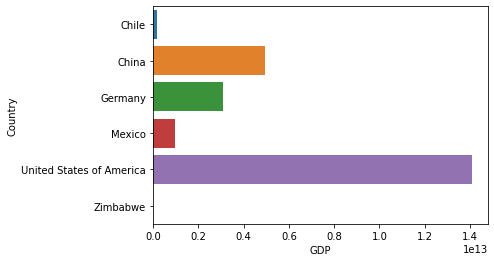

In [39]:
sns.barplot(x="GDP", y="Country", data=df_mean)
plt.show()

GDP in the US is far higher thant the others.

# Evolution during time

### Evolution of GDP in 15 years

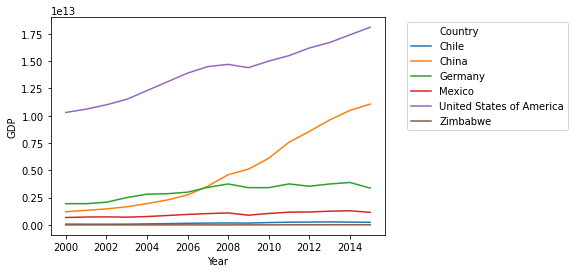

In [19]:
sns.lineplot(x=df.Year, y=df["GDP"], hue=df.Country)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

USA and China are the two countries with the highest rise for GDP. It may be easier to see if we make a graph for each country.

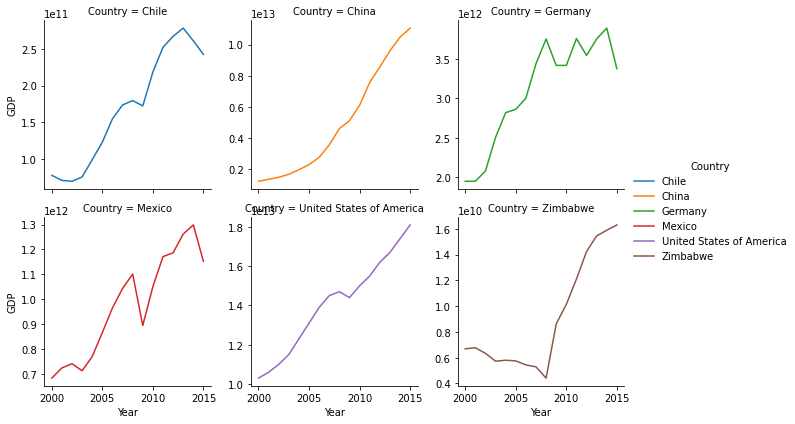

In [53]:
GDP_sep = sns.FacetGrid(df, col="Country", hue = "Country", col_wrap=3, sharey = False)

GDP_sep = GDP_sep.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP")

GDP_sep

Every country has been increasing their GDP. For Zimbabwe, it was decreasing between 2000 and 2008 and the increase after is bigger than the others.

### Evolution of Life expectancy in 15 years

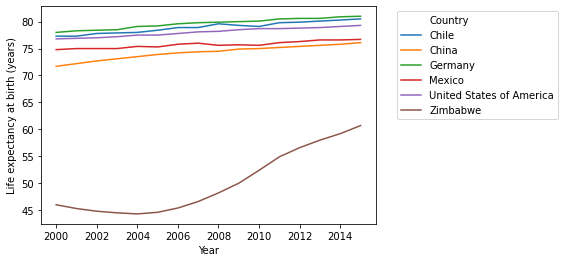

In [14]:
sns.lineplot(x=df.Year, y=df["Life expectancy at birth (years)"], hue=df.Country)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

There seems to have a rise of life expectancy for each country but like the graph for GDP, it may be easier to see if we make a graph for each country.

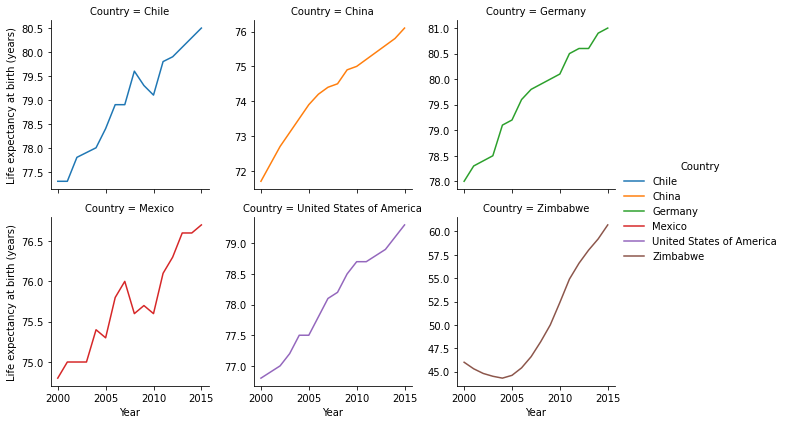

In [59]:
life_sep = sns.FacetGrid(df, col="Country", hue = "Country", col_wrap=3, sharey = False)

life_sep = (life_sep.map(sns.lineplot,"Year","Life expectancy at birth (years)")
            .add_legend()
            .set_axis_labels("Year","Life expectancy at birth (years)"))

life_sep

Every country has been increasing their life expectancy. For Zimbabwe, it was decreasing between 2000 and 2004 and, like GDP it has increasing faster than the others after. 

It may be good to explore the correlation between GDP and life expectancy.

# Correlation between GDP and Life expectancy

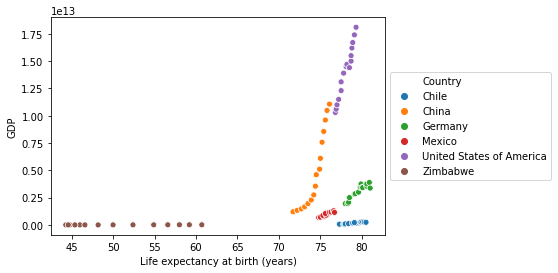

In [67]:
sns.scatterplot(x=df["Life expectancy at birth (years)"], y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

To really explore the correlation between GDP and life expectancy, we will again split the graphs for the countries.

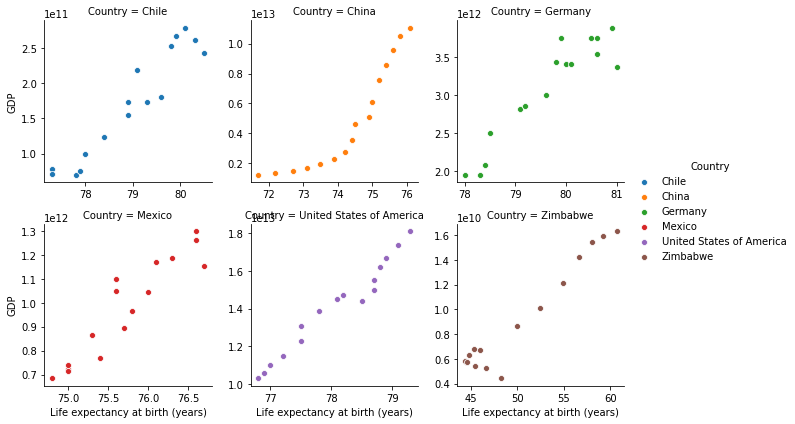

In [68]:
corr = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
corr = (corr.map(sns.scatterplot,"Life expectancy at birth (years)", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP"));
corr

For most of the countries (a little bit less for China) the relationship between GDP and life expectancy is linear and positive. This indicate that there is a positive relationship between GDP and life expectancy, so the economically healthier is the country, the higher is the life expectancy.